In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('C:/Users/askha/Downloads/nyc.csv.zip', compression='zip')

In [48]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [53]:
def haversine(start_lat, start_long, end_lat, end_long, radius=6371):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    start_lat, start_long, end_lat, end_long = map(np.radians, [start_lat, start_long, end_lat, end_long])
    
    # haversine formula 
    dlon = end_long - start_long 
    dlat = end_lat - start_lat 
    a = np.sin(dlat/2)**2 + np.cos(start_lat) * np.cos(end_lat) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r
    

In [54]:
df['distance'] = pd.Series(haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude) for i, row in df.iterrows())

In [55]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [75]:
df['distance'] = df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].apply(lambda row: haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude), axis=1)
longest = df.distance.max()

In [79]:
df.distance.max()

8667.818812217454

In [73]:
dists = [ ]
for row in df.itertuples():
    dists.append(haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude))
df['distance'] = dists

In [69]:
df['distance'] = pd.Series(haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude) for i, row in df.iterrows())

In [76]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [81]:
df.loc[(df.dropoff_longitude == 0) | (df.dropoff_latitude == 0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3,0.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1,0.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1,0.0
124,2013-01-17 17:22:00.00000043,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2,0.0
192,2010-09-05 17:08:00.00000092,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5,0.0
...,...,...,...,...,...,...,...,...,...
49625,2012-01-09 19:50:27.0000001,12.1,2012-01-09 19:50:27 UTC,0.0,0.0,0.0,0.0,1,0.0
49816,2012-02-20 00:54:00.000000100,4.9,2012-02-20 00:54:00 UTC,0.0,0.0,0.0,0.0,1,0.0
49845,2009-03-02 21:57:15.0000001,6.6,2009-03-02 21:57:15 UTC,0.0,0.0,0.0,0.0,3,0.0
49856,2010-04-19 17:25:00.000000170,10.9,2010-04-19 17:25:00 UTC,0.0,0.0,0.0,0.0,5,0.0


array([[<AxesSubplot:title={'center':'pickup_longitude'}>,
        <AxesSubplot:title={'center':'pickup_latitude'}>],
       [<AxesSubplot:title={'center':'dropoff_longitude'}>,
        <AxesSubplot:title={'center':'dropoff_latitude'}>]], dtype=object)

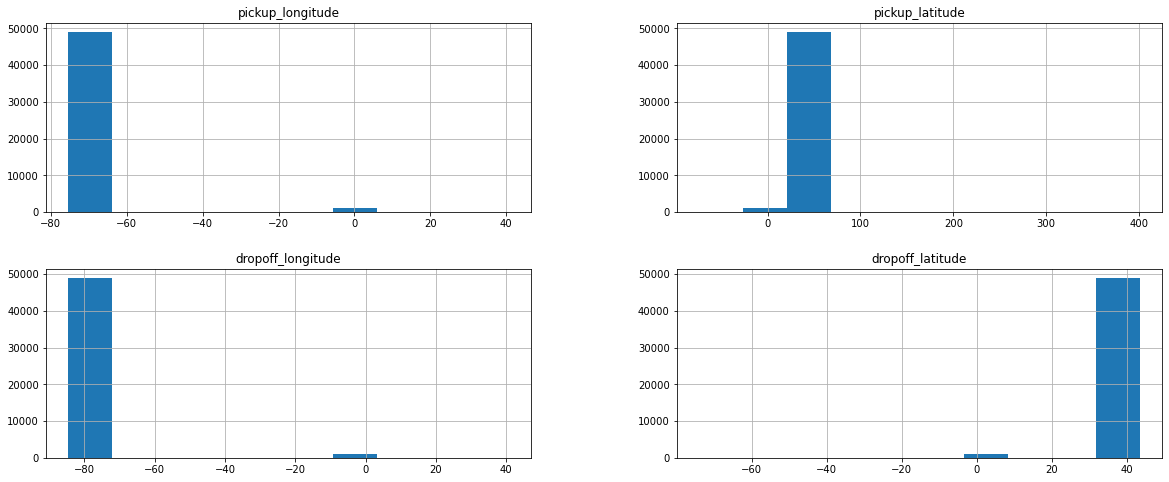

In [99]:
df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].hist(figsize = (20,8))

In [109]:
df_filtered = df.loc[(df.dropoff_longitude < -60) & (df.dropoff_latitude > 10) & (df.pickup_longitude < -60) & (df.pickup_latitude > 10) & (df.distance <= 50) & (df.pickup_latitude < 120)]

In [112]:
df_filtered.sort_values('distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
33502,2014-02-22 02:44:00.00000052,136.00,2014-02-22 02:44:00 UTC,-73.989540,40.757032,-73.860580,41.147487,1,44.746988
12349,2010-05-01 15:23:00.00000097,104.67,2010-05-01 15:23:00 UTC,-73.797225,40.639720,-73.840545,41.030892,1,43.648755
649,2009-09-19 10:34:41.0000002,66.30,2009-09-19 10:34:41 UTC,-74.438233,40.993260,-74.185996,40.693874,2,39.476975
6308,2010-08-23 11:06:00.000000121,45.00,2010-08-23 11:06:00 UTC,-73.422692,40.747012,-73.870317,40.773160,1,37.812945
18656,2009-12-08 12:58:00.00000033,49.57,2009-12-08 12:58:00 UTC,-73.781842,40.644690,-74.177562,40.695237,5,33.844445
...,...,...,...,...,...,...,...,...,...
31060,2010-10-14 19:33:00.000000253,4.90,2010-10-14 19:33:00 UTC,-73.982855,40.735333,-73.982855,40.735333,1,0.000000
31041,2012-11-30 13:46:02.0000004,11.50,2012-11-30 13:46:02 UTC,-73.983847,40.738317,-73.983847,40.738317,1,0.000000
31024,2010-11-28 02:45:00.000000134,14.50,2010-11-28 02:45:00 UTC,-73.896035,40.761718,-73.896035,40.761718,5,0.000000
30923,2011-11-09 20:39:08.0000001,60.50,2011-11-09 20:39:08 UTC,-74.036185,40.742231,-74.036185,40.742231,1,0.000000


In [123]:
pokemon = pd.read_csv('C:/Users/askha/Downloads/Pokemon.csv')

In [129]:
pokemon = pokemon.rename(columns=lambda x: x.replace('. ', '_').replace(' ', '_').replace('#', 'id').lower())

In [131]:
pokemon

,id,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [154]:
legends = pokemon.groupby('generation') \
    .legendary.value_counts().to_frame()

In [156]:
legends.rename(columns=({'legendary' : 'legendary_count'}))

legendary_count
generation legendary                 
1          False                  160
           True                     6
2          False                  101
           True                     5
3          False                  142
           True                    18
4          False                  108
           True                    13
5          False                  150
           True                    15
6          False                   74
           True                     8

In [157]:
legends.unstack(level = 1)

legendary     
legendary      False True
generation               
1                160    6
2                101    5
3                142   18
4                108   13
5                150   15
6                 74    8

Сгруппируйте датасет pokemon по переменным generation и type_1, посчитайте количество легендарных покемонов внутри групп. Приведите данные в формат датафрейма, а затем используйте unstack(). В качестве ответа выберите вид и поколение покемона, среди которых больше всего легендарных.

Hint: обратиться к колонке с мультииндексом можно с помощью .loc[:,('legendary', True)]

In [162]:
df = pokemon.groupby(['generation', 'type_1']) \
    .legendary.value_counts().to_frame()

In [163]:
df

legendary
generation type_1   legendary           
1          Bug      False             14
           Dragon   False              3
           Electric False              8
                    True               1
           Fairy    False              2
...                                  ...
6          Psychic  True               2
           Rock     False              7
                    True               2
           Steel    False              5
           Water    False              5

[134 rows x 1 columns]

In [165]:
df = df.unstack(level = 2)

In [173]:
df.loc[:,('legendary', True)].idxmax()

(3, 'Dragon')

In [175]:
superheroes_power_matrix = pd.read_csv('C:/Users/askha/Downloads/superheroes_power_matrix.csv')

In [177]:
superheroes_power_matrix

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [178]:
superheroes_long = pd.wide_to_long(superheroes_power_matrix, [1:], i=['Name'], j='superpower', sep='_')

SyntaxError: invalid syntax (Temp/ipykernel_22016/1254426776.py, line 1)

In [179]:
superheroes_power_matrix.melt().head()

,variable,value
0,Name,3-D Man
1,Name,A-Bomb
2,Name,Abe Sapien
3,Name,Abin Sur
4,Name,Abomination


In [183]:
superheroes_long = superheroes_power_matrix.melt(id_vars='Name', var_name='superpower', value_name='value')

In [184]:
superheroes_long

,Name,superpower,value
0,3-D Man,Agility,True
1,A-Bomb,Agility,False
2,Abe Sapien,Agility,True
3,Abin Sur,Agility,False
4,Abomination,Agility,False
...,...,...,...
111384,Yellowjacket II,Omniscient,False
111385,Ymir,Omniscient,False
111386,Yoda,Omniscient,False
111387,Zatanna,Omniscient,False


Для того, чтобы соединить силы в списки и привести данные в желаемую форму, отфильтруйте колонку value так, чтобы остались строки только со значением True. Сгруппируйте датасет по Name, после чего возьмите столбец superpower и используйте .apply(list). Результат сохраните в superheroes_powers. Обратите внимание, что результирующий объект тоже должен быть датафреймом, а колонки должно быть всего две — Name и superpower.

In [192]:
superheroes_powers = superheroes_long.query('value == True') \
    .groupby('Name') \
    .superpower.apply(list) \
    .to_frame() \
    .reset_index()

In [193]:
superheroes_powers

,Name,superpower
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
...,...,...
662,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
663,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


In [195]:
bikes_q1 = pd.read_csv('C:/Users/askha/Downloads/bikes_q1_sample.csv')

In [197]:
bikes_q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17617135,2018-01-22 20:04:31,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
1,17897619,2018-03-16 19:47:59,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2,17881307,2018-03-14 18:49:20,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
3,17881130,2018-03-14 18:33:48,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
4,17686289,2018-02-05 17:39:14,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0


In [206]:
bikes_q1.dtypes

trip_id                int64
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [200]:
bikes_q1.start_time = pd.to_datetime(bikes_q1.start_time)

In [204]:
bikes_q1 = bikes_q1.set_index('start_time')

In [205]:
bikes_q1

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-01-22 20:04:31,17617135,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
2018-03-16 19:47:59,17897619,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2018-03-14 18:49:20,17881307,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
2018-03-14 18:33:48,17881130,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
2018-02-05 17:39:14,17686289,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28 17:16:53,17792363,2018-02-28 17:18:49,2401,116.0,50,Clark St & Congress Pkwy,41,Federal St & Polk St,Subscriber,Male,1991.0
2018-02-08 11:52:44,17695807,2018-02-08 11:58:13,4687,329.0,18,Wacker Dr & Washington St,39,Wabash Ave & Adams St,Subscriber,Male,1979.0
2018-03-22 17:18:21,17938644,2018-03-22 17:24:13,6200,352.0,59,Wabash Ave & Roosevelt Rd,50,Clark St & Congress Pkwy,Subscriber,Male,1968.0


В данных имеется как дата аренды, так и её точное время начала и окончания с точностью до секунд. Примените метод pd.resample() и агрегируйте данные по дням. В качестве ответа укажите максимальное число аренд за день.

In [209]:
bikes_q1.resample(rule='D').size().max()

4196

In [211]:
bikes_april = pd.read_csv('C:/Users/askha/Downloads/bikes_april.csv')

In [212]:
bikes_april.head()

,start_time,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2018-04-01 00:10:23,18000531,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0
1,2018-04-01 00:15:49,18000533,2018-04-01 00:19:47,4570,238.0,128,Damen Ave & Chicago Ave,130,Damen Ave & Division St,Subscriber,Male,1978.0
2,2018-04-01 00:17:00,18000534,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
3,2018-04-01 00:20:00,18000536,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
4,2018-04-01 00:23:19,18000538,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0


In [213]:
bikes_april.dtypes

start_time            object
trip_id                int64
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [214]:
bikes_april.start_time = pd.to_datetime(bikes_april.start_time)
bikes_april = bikes_april.set_index('start_time')

In [230]:
day_bike = bikes_april \
    .groupby('usertype') \
    .trip_id \
    .resample(rule='D') \
    .count()

In [232]:
day_bike.loc[('Subscriber', '2018-04-18')]

2196

Объедините сэмплы данных за нужные месяцы в один общий датасет bikes. Сделайте преобразование по дням для каждой группы пользователей (usertype), затем выберите дни, в которые число аренд, сделанных customers, было больше, чем у subscribers.

In [239]:
bike_df = pd.concat([
            pd.read_csv('C:/Users/askha/Downloads/bikes_q2_sample_apr.csv'),
            pd.read_csv('C:/Users/askha/Downloads/bikes_q2_sample_may.csv'),
            pd.read_csv('C:/Users/askha/Downloads/bikes_q2_sample_jun.csv'),
            pd.read_csv('C:/Users/askha/Downloads/bikes_q3_sample_july.csv'),
            pd.read_csv('C:/Users/askha/Downloads/bikes_q3_sample_aug.csv'),
            pd.read_csv('C:/Users/askha/Downloads/bikes_q3_sample_sep.csv'),
            pd.read_csv('C:/Users/askha/Downloads/bikes_q4_sample_oct.csv'),
            pd.read_csv('C:/Users/askha/Downloads/bikes_q4_sample_nov.csv'),
            pd.read_csv('C:/Users/askha/Downloads/bikes_q4_sample_dec.csv')
            ])

In [244]:
bike_df.head()

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-04-01 00:17:00,18000534,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
2018-04-01 00:20:00,18000536,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
2018-04-01 00:23:19,18000538,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0
2018-04-01 00:24:46,18000540,2018-04-01 00:44:23,6401,"1,177.0",596,Benson Ave & Church St,517,Clark St & Jarvis Ave,Subscriber,Male,1974.0
2018-04-01 00:26:04,18000541,2018-04-01 00:31:05,6333,301.0,145,Mies van der Rohe Way & Chestnut St,24,Fairbanks Ct & Grand Ave,Subscriber,Male,1984.0


In [243]:
bike_df.dtypes

trip_id                int64
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [242]:
bike_df.start_time = pd.to_datetime(bike_df.start_time)
bike_df = bike_df.set_index('start_time')

In [269]:
day_bike_df = bike_df \
    .groupby('usertype') \
    .trip_id \
    .resample(rule='D') \
    .size()

In [270]:
bdf = day_bike_df.unstack(level='usertype')

In [275]:
bdf.query('Customer > Subscriber')

usertype,Customer,Subscriber
start_time,,
2018-05-27,3263,2449
2018-09-02,2752,2183


In [276]:
bike_df

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-04-01 00:17:00,18000534,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
2018-04-01 00:20:00,18000536,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
2018-04-01 00:23:19,18000538,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0
2018-04-01 00:24:46,18000540,2018-04-01 00:44:23,6401,"1,177.0",596,Benson Ave & Church St,517,Clark St & Jarvis Ave,Subscriber,Male,1974.0
2018-04-01 00:26:04,18000541,2018-04-01 00:31:05,6333,301.0,145,Mies van der Rohe Way & Chestnut St,24,Fairbanks Ct & Grand Ave,Subscriber,Male,1984.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:40:12,21742433,2018-12-31 23:47:41,6312,449.0,42,Wabash Ave & Cermak Rd,193,State St & 29th St,Subscriber,Male,1992.0
2018-12-31 23:42:07,21742436,2018-12-31 23:50:58,4620,531.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1989.0
2018-12-31 23:45:13,21742437,2018-12-31 23:50:05,246,292.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Male,1984.0


In [281]:
bikes_summer = bike_df.loc['2018-06-01' : '2018-08-31' ]

In [282]:
bikes_summer

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-06-01 00:04:40,18709077,2018-06-01 00:06:47,3155,127.0,128,Damen Ave & Chicago Ave,214,Damen Ave & Grand Ave,Subscriber,Female,1978.0
2018-06-01 00:06:08,18709080,2018-06-01 00:24:18,2807,"1,090.0",258,Logan Blvd & Elston Ave,69,Damen Ave & Pierce Ave,Customer,NaN,NaN
2018-06-01 00:08:01,18709086,2018-06-01 00:32:55,2737,"1,494.0",337,Clark St & Chicago Ave,225,Halsted St & Dickens Ave,Customer,Male,1988.0
2018-06-01 00:09:02,18709091,2018-06-01 00:19:21,6089,619.0,210,Ashland Ave & Division St,56,Desplaines St & Kinzie St,Subscriber,Male,1987.0
2018-06-01 00:09:28,18709092,2018-06-01 00:14:44,2352,316.0,240,Sheridan Rd & Irving Park Rd,303,Broadway & Cornelia Ave,Subscriber,Male,1997.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:49:34,20479557,2018-08-31 23:56:20,4289,406.0,374,Western Ave & Walton St,69,Damen Ave & Pierce Ave,Subscriber,Male,1987.0
2018-08-31 23:49:56,20479559,2018-09-01 00:30:37,6337,"2,441.0",497,Kimball Ave & Belmont Ave,599,Valli Produce - Evanston Plaza,Subscriber,Male,1989.0
2018-08-31 23:50:01,20479560,2018-08-31 23:58:00,1429,479.0,113,Bissell St & Armitage Ave,16,Paulina Ave & North Ave,Subscriber,Male,1987.0


In [286]:
top_destination = bikes_summer.to_station_name.value_counts().idxmax()

In [304]:
bad_day = bikes_summer.query('to_station_name == @top_destination') \
    .resample(rule='D') \
    .trip_id \
    .size() \
    .idxmin() \
    .strftime('%Y-%m-%d')

In [310]:
bikes_summer['weekday'] = bikes_summer.index.day_name()

C:\Users\askha\AppData\Local\Temp/ipykernel_22016/630632173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_summer['weekday'] = bikes_summer.index.day_name()


In [312]:
bikes_summer.head()

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,weekday
start_time,,,,,,,,,,,,
2018-06-01 00:04:40,18709077,2018-06-01 00:06:47,3155,127.0,128,Damen Ave & Chicago Ave,214,Damen Ave & Grand Ave,Subscriber,Female,1978.0,Friday
2018-06-01 00:06:08,18709080,2018-06-01 00:24:18,2807,"1,090.0",258,Logan Blvd & Elston Ave,69,Damen Ave & Pierce Ave,Customer,NaN,NaN,Friday
2018-06-01 00:08:01,18709086,2018-06-01 00:32:55,2737,"1,494.0",337,Clark St & Chicago Ave,225,Halsted St & Dickens Ave,Customer,Male,1988.0,Friday
2018-06-01 00:09:02,18709091,2018-06-01 00:19:21,6089,619.0,210,Ashland Ave & Division St,56,Desplaines St & Kinzie St,Subscriber,Male,1987.0,Friday
2018-06-01 00:09:28,18709092,2018-06-01 00:14:44,2352,316.0,240,Sheridan Rd & Irving Park Rd,303,Broadway & Cornelia Ave,Subscriber,Male,1997.0,Friday


In [333]:
bikes_summer \
    .groupby(['weekday', 'to_station_name']) \
    .agg({'trip_id' : 'count'}) \
    .sort_values('trip_id', ascending=False)

,,trip_id
weekday,to_station_name,
Saturday,Streeter Dr & Grand Ave,3461
Sunday,Streeter Dr & Grand Ave,2565
Friday,Streeter Dr & Grand Ave,1726
Saturday,Lake Shore Dr & North Blvd,1690
Wednesday,Streeter Dr & Grand Ave,1669
...,...,...
Sunday,Pulaski Rd & Lake St,1
Monday,Racine Ave & 65th St,1
Saturday,Halsted St & 59th St,1
